# Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix


# Data Pre-Processing

In [365]:
churn = pd.read_csv("C:/Users/oadeb/Desktop/Machine Learning/Datasets/Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [366]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [367]:
churn.shape

(7043, 21)

In [368]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [369]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [370]:
## The 'TotalCharges' column has some missing values and the data type is object but it should be numeric.
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')   # Coerce errors to NaN that is to it is used to replace non-numeric values with NaN

In [371]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [372]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [373]:
churn.dropna(inplace=True)  # this drops the rows with missing values.

In [374]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [375]:
churn.shape

(7032, 21)

As customerID wouldn't help with the prediction I will be dropping it.

In [376]:
churn.drop(columns=['customerID'], inplace=True)   # to drop the customerID

In [377]:
churn.describe(include='object').T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472


### Label Encoding
Encoding all the categorical variables as numerical because categorical variables cannot be directly used in machine learning algorithms.
This can be done using label_encoder() or map() function.
The difference between these two functions is that label_encoder() is a function from sklearn.preprocessing module and map() is a function from pandas module.

In [378]:
churn['gender'] = churn['gender'].map({'Female': 0, 'Male': 1})
churn['Partner'] = churn['Partner'].map({'No': 0, 'Yes': 1})
churn['Dependents'] = churn['Dependents'].map({'No': 0, 'Yes': 1})
churn['PhoneService'] = churn['PhoneService'].map({'No': 0, 'Yes': 1})
churn['PaperlessBilling'] = churn['PaperlessBilling'].map({'No': 0, 'Yes': 1})
churn['MultipleLines'] = churn['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 2})
churn['InternetService'] = churn['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
churn['OnlineSecurity'] = churn['OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
churn['OnlineBackup'] = churn['OnlineBackup'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
churn['DeviceProtection'] = churn['DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
churn['TechSupport'] = churn['TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
churn['StreamingTV'] = churn['StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
churn['StreamingMovies'] = churn['StreamingMovies'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
churn['Contract'] = churn['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
churn['PaymentMethod'] = churn['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
churn['Churn'] = churn['Churn'].map({'No': 0, 'Yes': 1})

## Data Visualization

In [379]:
# Starting with the number of customers that have churned out and the numbers of customers left.
churn['Churn'].value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

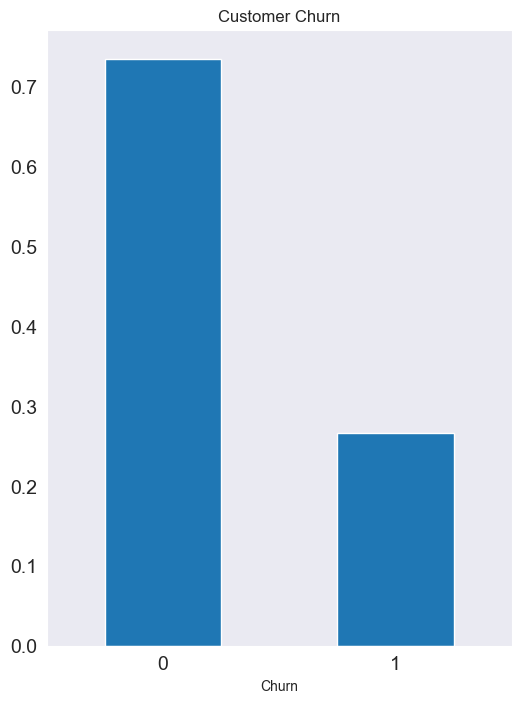

In [430]:
churn["Churn"].value_counts(normalize=True).plot(kind='bar', title='Customer Churn',figsize=(6, 8), fontsize=14, rot=0)
ax = plt.gca()
ax.grid(False)

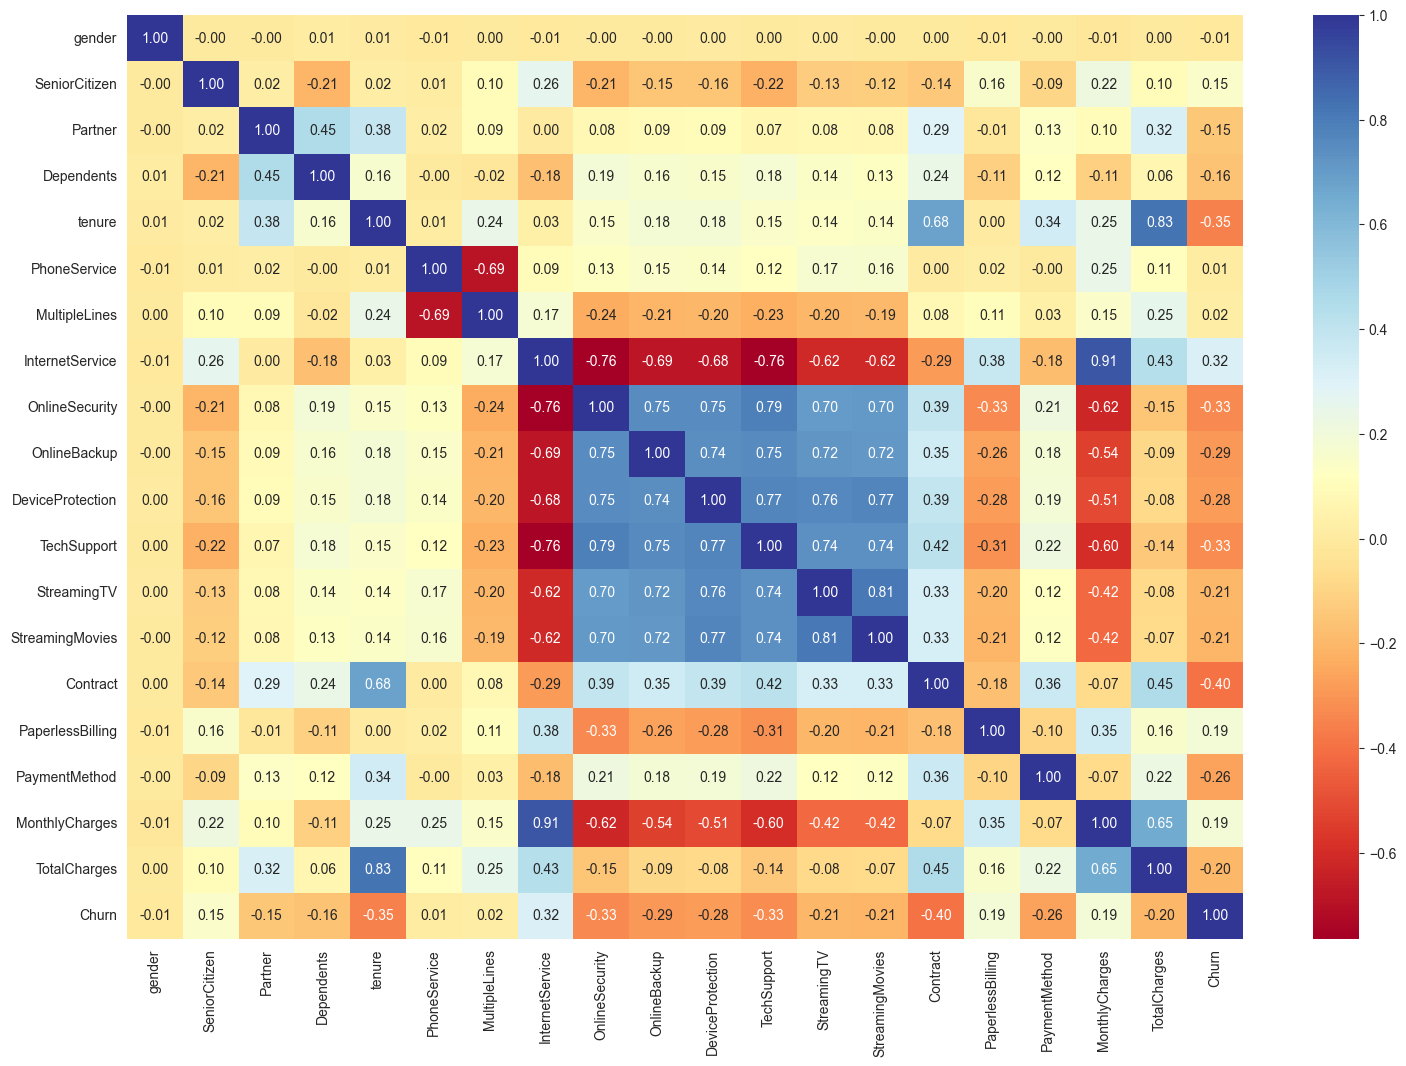

In [381]:
# Correlation between the features
corr = churn.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True, cmap='RdYlBu', fmt=".2f")
plt.show()

# Model Building

In [382]:
x = churn.iloc[:, :-1].values
y = churn.iloc[:, -1].values

In [383]:
# splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [384]:
# Creating a Decision Tree Classifier
clf = tree.DecisionTreeClassifier(random_state=45)    # clf means classifier
clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [385]:
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred)}")

Training Accuracy: 0.9978666666666667
Testing Accuracy: 0.7100213219616205


In [427]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1038
           1       0.45      0.49      0.47       369

    accuracy                           0.71      1407
   macro avg       0.63      0.64      0.63      1407
weighted avg       0.72      0.71      0.71      1407



In [428]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4125
           1       1.00      0.99      1.00      1500

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



In [386]:
# Creating a Random Forest Classifier
rf = RandomForestClassifier(random_state=45)
rf.fit(x_train, y_train)
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

In [387]:
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_rf)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred_rf)}")

Training Accuracy: 0.9978666666666667
Testing Accuracy: 0.7889125799573561


In [426]:
# Classification Report
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.62      0.49      0.55       369

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [425]:
# Classification Report
print(classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4125
           1       1.00      1.00      1.00      1500

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



### HYPERPARAMETER TUNING
There are two techniques for hyperparameter tuning:
1. RandomizedSearchCV: this is used when we want to explore a large range of hyperparameters and we don't have a lot of computational resources.
2. GridSearchCV: this is used when we want to explore a smaller range of hyperparameters and we have a lot of computational resources.

The best values for each parameter would be selected using these techniques.

In [388]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']    # Square root of number of features and log2 of number of features
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]     # Range of values for max_depth
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [389]:
# To check the number of combinations for the hyperparameters so that the best values can be selected

len(np.linspace(start=200, stop=2000, num=10))*\
len(['sqrt', 'log2']) *\
len([int(x) for x in np.linspace(start=10, stop=110, num=11)]) *\
len([2, 5, 10]) *\
len([1, 2, 4]) *\
len([True, False])

3960

#### How To Implement RandomizedSearchCV
1. Create the base model to tune
2. Create an instance of the RandomizedSearchCV class
3. Random search of parameters, using 3 fold cross validation,
4. Search across 100 different combinations and use all available cores
5. Fit the random search model
6. Print the best parameters
7. Print the best score
8. Predict the test set
9. Print the accuracy score
10. Print the confusion matrix

In [390]:
# First create the base model
rf = RandomForestClassifier(random_state=45)

# Create the random search model, Random search of parameters, using 3 fold cross validation
# and search across 100 different combinations, using all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=45, n_jobs=-1, scoring='neg_mean_squared_error', return_train_score=True)

# scoring = 'neg_mean_squared_error' is used for regression problems
# scoring = 'accuracy', 'f1', 'precision', 'recall', 'roc_auc' are used for classification problems
# Where 'f1' is the harmonic mean of precision and recall, and 'roc_auc' is the area under the receiver operating characteristic curve.
# 'roc_auc' is used for binary classification problems with two classes, while 'f1' is used for multi-class classification problems.
# error_score='raise' is used to raise an error if a score cannot be computed. It is used to prevent the model from continuing to train if a score cannot be computed.
# error_score=np.nan is used to return NaN if a score cannot be computed. It is used to prevent the model from stopping if a score cannot be computed.

# Fit the random search model
rf2 = rf_random.fit(x_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [394]:
print(rf2.best_params_)

{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}


In [397]:
# Using the best parameters found by RandomizedSearchCV above
rf2 = RandomForestClassifier(n_estimators=1800,
                             max_features='log2',
                             max_depth=10,
                             min_samples_split=5,
                             min_samples_leaf=4,
                             bootstrap=False)

rf2.fit(x_train, y_train)
y_train_pred_rf2 = rf2.predict(x_train)
y_test_pred_rf2 = rf2.predict(x_test)

In [398]:
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_rf2)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred_rf2)}")

Training Accuracy: 0.8753777777777778
Testing Accuracy: 0.8024164889836531


So when the best parameters found by RandomizedSearchCV are used, the accuracy of the model increases. And when compared to the accuracy of the Decision tree found earlier, the increase is calculated as (0.802 - 0.788) = 0.014. In percentage, it is 1.4%.

# Model Evaluation
For checking the feature importance of the fitted model

In [399]:
importance = rf2.feature_importances_   # This gives the importance of each feature

In [400]:
importance = pd.Series(importance) # This converts the importance to a pandas series
importance

0     0.010713
1     0.011544
2     0.008854
3     0.009437
4     0.166148
5     0.003826
6     0.015597
7     0.065837
8     0.076824
9     0.024817
10    0.017351
11    0.068645
12    0.013935
13    0.015962
14    0.159414
15    0.019231
16    0.067788
17    0.101974
18    0.142104
dtype: float64

In [402]:
new_df = pd.DataFrame(columns=['Feature', 'Importance'])  # This creates a new dataframe for feature importance
cols = list(churn.drop('Churn', axis=1).columns)          # This gets the column names of the dataframe and assigns it to cols. Then it removes the 'Churn' column

new_df['Feature'] = cols                            # This assigns the column names to the 'Feature' column
new_df['Importance'] = importance
new_df.sort_values(by='Importance', ascending=False)      # This sorts the dataframe by importance in descending order

,Feature,Importance
4,tenure,0.166148
14,Contract,0.159414
18,TotalCharges,0.142104
17,MonthlyCharges,0.101974
8,OnlineSecurity,0.076824
11,TechSupport,0.068645
16,PaymentMethod,0.067788
7,InternetService,0.065837
9,OnlineBackup,0.024817
15,PaperlessBilling,0.019231


The above shows that tenure is the most important feature followed by contract, TotalCharges and MonthlyCharges.

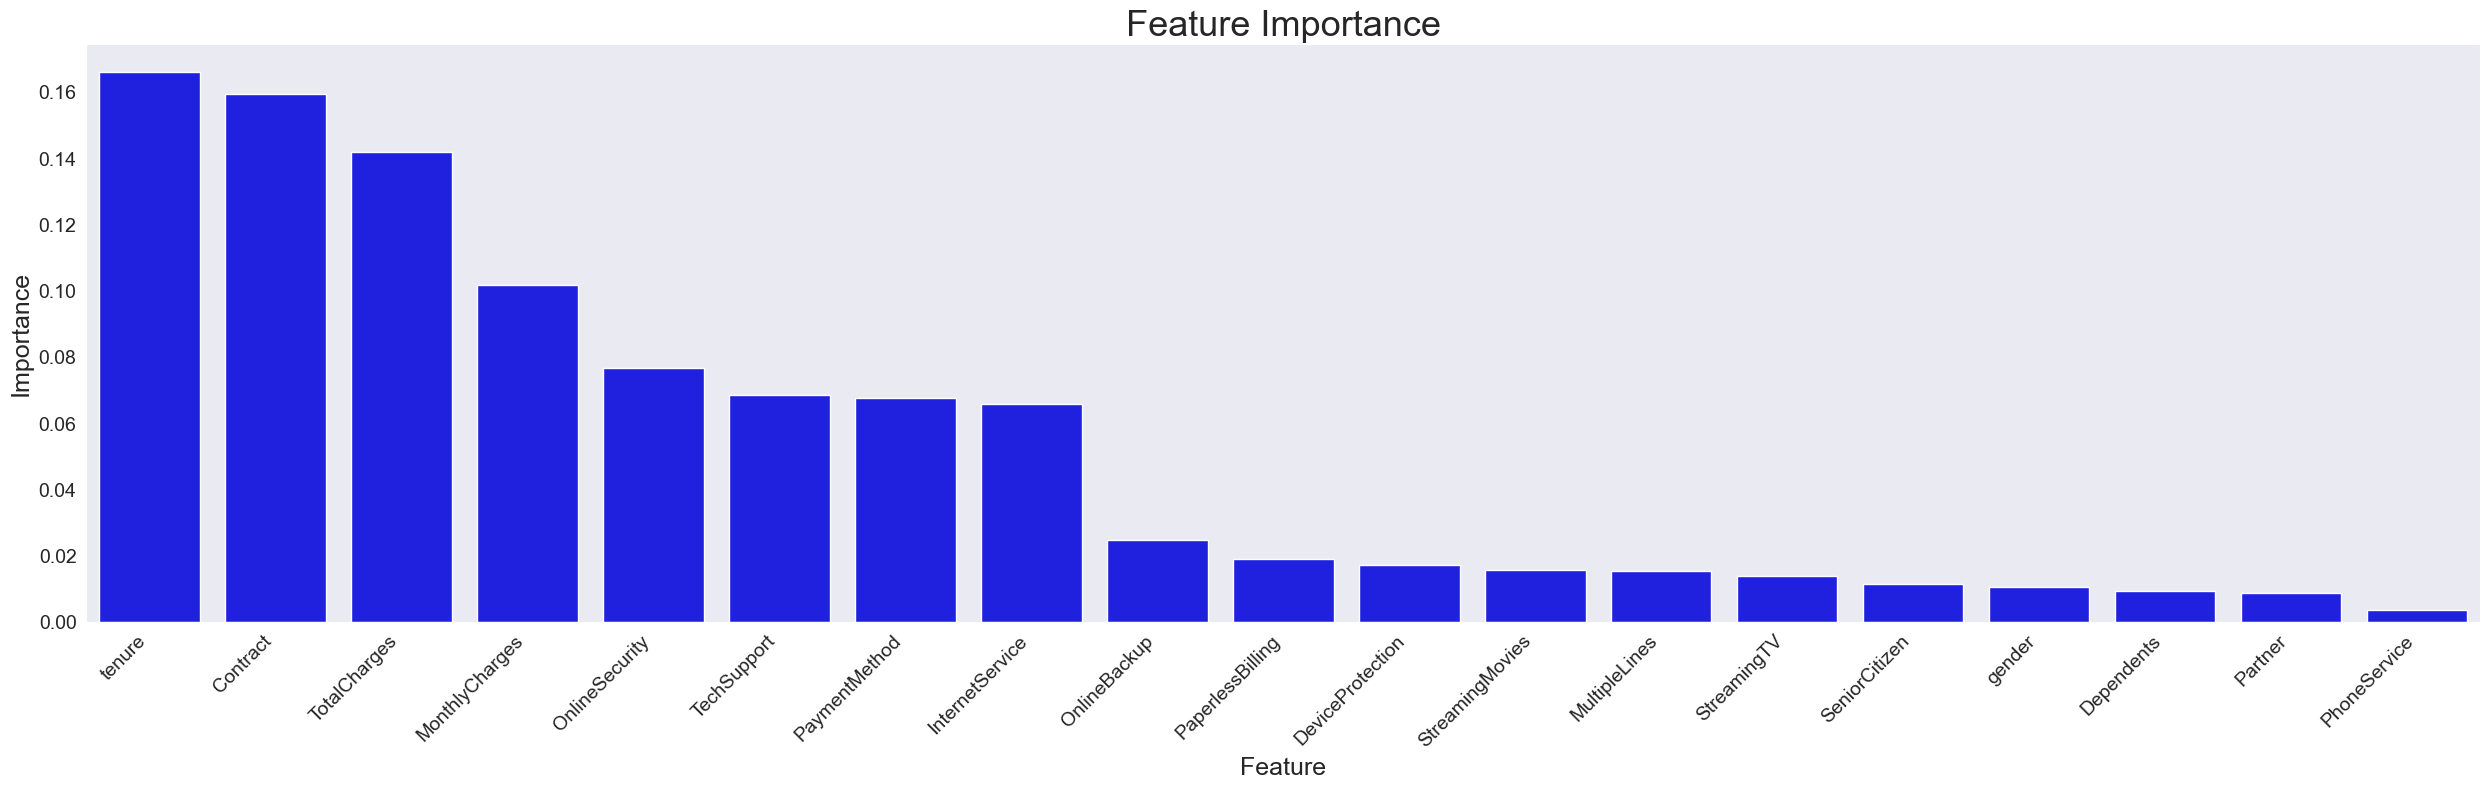

In [416]:
plt.figure(figsize=(25, 8))
sns.barplot(x='Feature', y='Importance', data=new_df, order=new_df.sort_values(by='Importance', ascending=False).Feature, color='blue')
ax = plt.gca()
ax.grid(False)
plt.title('Feature Importance', fontsize=26)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# Classification Report

In [417]:
from sklearn.metrics import classification_report

In [422]:
print(classification_report(y_test, y_test_pred_rf2))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.66      0.51      0.58       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [424]:
print(classification_report(y_train, y_train_pred_rf2))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4125
           1       0.82      0.68      0.74      1500

    accuracy                           0.88      5625
   macro avg       0.86      0.81      0.83      5625
weighted avg       0.87      0.88      0.87      5625

